# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 1</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ZapataCristian*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

## Primer punto. Optimización de funciones escalares usando `sympy` (30 puntos).

**Enunciado.** Un granjero tiene $2400$ m de cerca y desea cercar un campo rectangular de longitud $x$ y altura $y$ que limita con un río recto. No necesita cercar a lo largo del río. ¿Cuáles son las dimensiones
del campo que tiene el área más grande?

Ver la siguiente figura como ayuda

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

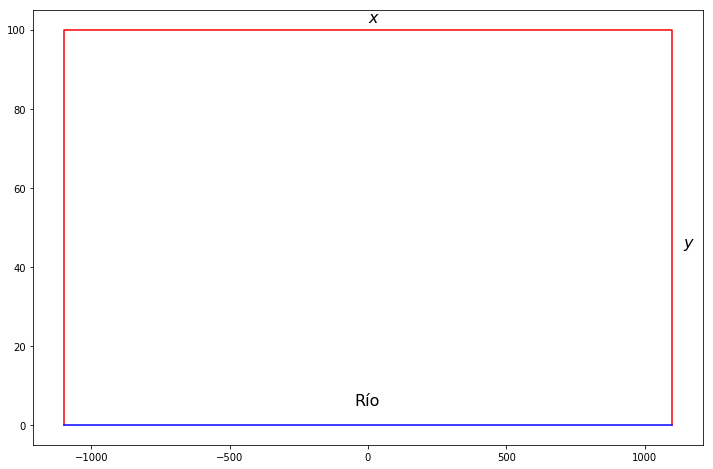

In [2]:
xr = [-1100, -1100, 1100, 1100]
yr = [0, 100, 100, 0]

xx = [-1100, 1100]
yx = [0, 0]

xy = [1100, 1100]
yy = [0, 100]

plt.figure(figsize = (12, 8))
plt.plot(xr, yr, 'r')
plt.plot(xx, yx, 'b')
#plt.plot(xy, yy, 'g')
plt.text(-50, 5, 'Río', fontsize = 16)
plt.text(1140, 45, '$y$', fontsize = 16, color = 'k')
plt.text(0, 102, '$x$', fontsize = 16, color = 'k')
plt.show()

**Punto 1 (10 puntos).** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido (Recuerde que las áreas no pueden ser negativas).

Realice este punto usando fórmulas en LaTeX, en celdas Markdown.

**Solución punto 1.**

$$A_R = xy$$

$$P_R = 2y+x = 2400$$

Por lo tanto despejando $y$

$$y = (2400-x)/2$$

Reemplazando

$$A_R(x) = \frac{x(2400-x)}{2}$$

El dominio es 

$$\text{Dom}_{A_R(x)}= [0,\,2400]$$


**Punto 2 (15 puntos).** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

**Solución punto 2.**

In [3]:
import sympy as sym

In [4]:
sym.var('x')

x

In [5]:
def AR(x):
    return x*(2400-x)/2

In [6]:
dA = sym.diff(AR(x),x)
dA

-x + 1200

In [7]:
xc=sym.solve(dA,x)
xc

[1200]

In [8]:
AR(0), AR(1200), AR(2400)

(0.0, 720000, 0.0)

El máximo de la función es alcanzado en $x = 1200$ y tiene un valor de $72000$

**Punto 3 (5 puntos).** ¿Cuáles son las dimensiones $x$ y $y$ del rectángulo resultante?

**Solución punto 3.**

Para la dimensión de x se tiene que

In [9]:
x = xc[0]
x

1200

Y para $y$ se tiene que

In [10]:
y = (2400-xc[0])/2
y

600

## Segundo punto. Programación lineal (35 puntos).

**Enunciado.** Una compañía aérea dispone de dos tipos de aviones $A_1$, y $A_2$., para cubrir un determinado
trayecto. El avión $A_1$, debe hacer el trayecto más veces que el avión $A_2$ pero no puede sobrepasar $120$
viajes. Entre los dos aviones deben hacer más de $60$ vuelos, pero menos de $200$. En cada viaje del avión $A_1$ la empresa gana $\$30000$ y $\$20000$ por cada viaje del avión $A_2$. ¿Cuántos viajes debe hacer cada avión para obtener el máximo de ganancias?

*Definición de variables*: Sea $x_1$ la cantidad de viajes del avión $A_1$ y $x_2$ la cantidad de e viajes del avión $A_2$.

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`). Adicionalmente, si se requiere, recuerde escribir las cotas (límites superiores e inferiores) para cada una de las variables.

**Solución punto 1.**

La función a maximizar viene dada por

$$\max_{x_1,x_2} 30000x_1 + 20000x_2$$

y las restricciones son las siguientes:

$$ 60\leq x_1 + x_2 \leq 200 $$
$$ x_1 \leq 120 $$
$$ x_2\leq x_1$$

In [1]:
import scipy.optimize as opt
import numpy as np

In [3]:
# Escriba acá las matrices como arreglos de Numpy
c = -np.array([30000,20000])
A = np.array([[-1,1],
              [-1,-1],
              [1,1],
              [1,0]])
b = np.array([0,-60,200,120])

**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos será la ganancia total?, ¿Cuántos viajes debe hacer cada avión?

In [4]:
sol = opt.linprog(c,A,b,method='revised simplex')

In [5]:
sol

     fun: -5200000.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 40., 140.,   0.,   0.])
  status: 0
 success: True
       x: array([120.,  80.])

La ganancia total en los intereses será de $5200000$

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `renewable_energy.csv` contiene información histórica anual de México relativa al consumo de energías de fuentes renovables en porcentaje desde el año 1990 hasta el año 2015. La primer columna corresponde al consecutivo, la segunda a los años, y la tercera al consumo.

Tomado de: https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?view=chart

**Punto 1 (10 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [91]:
import pandas as pd

In [93]:
archivo = 'renewable_energy.csv'
data = pd.read_csv(archivo)
data

,Year,% of total final energy consumption
0,1990,14.413302
1,1991,13.195512
2,1992,13.427092
3,1993,13.303969
4,1994,11.863103
5,1995,13.261833
6,1996,13.064724
7,1997,12.699777
8,1998,12.238453
9,1999,12.748461


**Punto 2 (15 puntos).** Usando el año como variable independiente $x$ y el consumo de energías renovables como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

**En caso de ser necesario, aplique el escalado de características usando el método de normalización**

Mostrar en un solo gráfico los datos de consumo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [4]:
import numpy as np
import scipy.optimize as opt

In [64]:
x = data.iloc[:,0]
y = data.iloc[:,1]
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

In [65]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [72]:
#Ajusta polinomio de grado 1
b01 = np.zeros(2)    #beta_inicial
ajuste1 = opt.minimize(fun_obj, b01, args=(x_norm,y_norm,1))

#Ajusta polinomio de grado 2
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x_norm,y_norm,2))

#Ajusta polinomio de grado 3
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x_norm,y_norm,3))

#Ajusta polinomio de grado 4
b04 = np.zeros(5)
ajuste4 = opt.minimize(fun_obj, b04, args=(x_norm,y_norm,4))

In [68]:
ajuste1

      fun: 0.27378107881388425
 hess_inv: array([[ 0.07264957, -0.10683761],
       [-0.10683761,  0.21367521]])
      jac: array([-3.7252903e-09, -3.7252903e-09])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.88606664, -0.98393945])

In [69]:
ajuste2

      fun: 0.22818684541875256
 hess_inv: array([[ 0.14440563, -0.5609048 ,  0.45651969],
       [-0.5609048 ,  3.07968152, -2.87832469],
       [ 0.45651969, -2.87832469,  2.88932303]])
      jac: array([ 8.27014446e-07, -2.58907676e-06, -9.29459929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([ 0.96948741, -1.50531779,  0.5213777 ])

In [70]:
ajuste3

      fun: 0.1590737589202797
 hess_inv: array([[  0.22934968,  -1.7004934 ,   3.37214998,  -1.94792408],
       [ -1.7004934 ,  18.12713567, -41.21721553,  25.57734215],
       [  3.37214998, -41.21721553, 100.34378265, -64.91704869],
       [ -1.94792408,  25.57734215, -64.91704869,  43.19195436]])
      jac: array([-1.32806599e-06,  2.74367630e-06,  3.03238630e-06,  2.81631947e-06])
  message: 'Optimization terminated successfully.'
     nfev: 120
      nit: 18
     njev: 20
   status: 0
  success: True
        x: array([ 0.86126234, -0.06350736, -3.15469812,  2.45071381])

In [73]:
ajuste4

      fun: 0.15348824262328895
 hess_inv: array([[ 3.06939551e-01, -3.56441596e+00,  1.20648031e+01,
        -1.55733088e+01,  6.79709350e+00],
       [-3.56441596e+00,  6.21510046e+01, -2.45658139e+02,
         3.45080996e+02, -1.58962906e+02],
       [ 1.20648031e+01, -2.45658139e+02,  1.04846563e+03,
        -1.54518191e+03,  7.35832516e+02],
       [-1.55733088e+01,  3.45080996e+02, -1.54518191e+03,
         2.35281848e+03, -1.14754948e+03],
       [ 6.79709350e+00, -1.58962906e+02,  7.35832516e+02,
        -1.14754948e+03,  5.69978612e+02]])
      jac: array([-8.92207026e-07,  4.75347042e-06, -3.51853669e-06, -2.65426934e-06,
        4.25428152e-06])
  message: 'Optimization terminated successfully.'
     nfev: 217
      nit: 29
     njev: 31
   status: 0
  success: True
        x: array([ 0.89114914, -0.78970597,  0.26437441, -2.93523081,  2.69309227])

In [74]:
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)
yhat4 = ajuste4.x.dot([x_norm**i for i in range(5)])*(max(y)-min(y)) + min(y)

In [75]:
import matplotlib.pyplot as plt

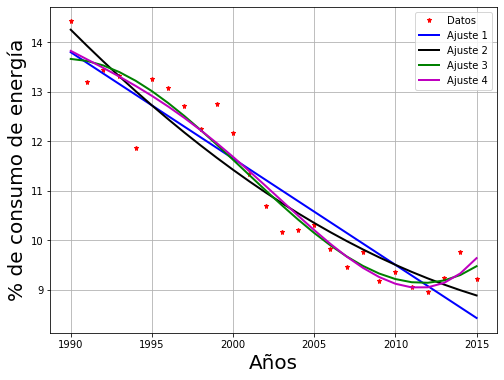

In [90]:
plt.figure(figsize=(8,6))

plt.plot(x, y, 'r*', ms=5, label='Datos')
plt.plot(x, yhat1, 'b', lw=2, label='Ajuste 1')
plt.plot(x, yhat2, 'k', lw=2, label='Ajuste 2')
plt.plot(x, yhat3, 'g', lw=2, label='Ajuste 3')
plt.plot(x, yhat4, 'm', lw=2, label='Ajuste 4')

plt.xlabel('Años',fontsize=20)
plt.ylabel('% de consumo de energía',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'error')

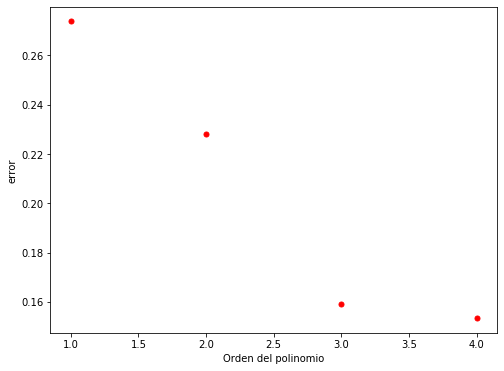

In [81]:
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun, ajuste4.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,5), error, 'ro', ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('error')

*Conclusión*

Según la gráfica anterior, el polinomio que mejor se ajusta es el de tercer orden.

**Punto 3 (10 puntos).** Con los polinomios ajustados en el punto anterior, estime el consumo en el año 2015 y compare con el dato real $9.215\%$.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [85]:
yhat1

array([13.79253832, 13.57809945, 13.36366057, 13.14922169, 12.93478282,
       12.72034394, 12.50590506, 12.29146619, 12.07702731, 11.86258843,
       11.64814956, 11.43371068, 11.21927181, 11.00483293, 10.79039405,
       10.57595518, 10.3615163 , 10.14707742,  9.93263855,  9.71819967,
        9.50376079,  9.28932192,  9.07488304,  8.86044416,  8.64600529,
        8.43156641])

In [89]:
yhat1[25],yhat2[25],yhat3[25], yhat4[25], y[25]

(8.431566410389427,
 8.886079101041409,
 9.47573156974496,
 9.638686696873242,
 9.215213455)

*Conclusión*. El polinomio que mejor estima este dato es el polinomio de grado tres.